In [8]:
# clear non squared images

import cv2

original_rims_path = './3_extracted_rims/'

original_rims_files = [f for f in os.listdir(original_rims_path) if os.path.isfile(os.path.join(original_rims_path, f))]
print(f"original length {len(original_rims_files)}")

counter = 0

for f in original_rims_files:
    counter = counter + 1
    if counter % 1000 == 0:
        print(counter)

    path = os.path.join(original_rims_path, f)

    img = cv2.imread(path)
    height, width, channels = img.shape
    if height != 280 or width != 280:
        # print(f"h: {height}, w: {width}, ch: {channels}")
        os.remove(path)

original_rims_files2 = [f for f in os.listdir(original_rims_path) if os.path.isfile(os.path.join(original_rims_path, f))]
print(f"new length {len(original_rims_files2)}")



original length 28567
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
new length 13546


In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
import tensorflow as tf
import numpy as np
import random as rnd

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [31]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

original_rims_path = './3_extracted_rims/'
original_rims_files = [f for f in os.listdir(original_rims_path) if os.path.isfile(os.path.join(original_rims_path, f))]
paths = []

for f in original_rims_files:
    path = os.path.join(original_rims_path, f)
    paths.append(path)

###

features = []

paths = rnd.sample(paths, 100)
imgs = []

for p in paths:
    # load the image as a 224x224 array
    img = load_img(paths[0], target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) / 255

    imgs.append(img)
    # print(img.shape)
    reshaped_img = img.reshape(1,224,224,3)
    # print(reshaped_img.shape)
    feature = model.predict(reshaped_img, use_multiprocessing=True)
    # print(features.shape)
    features.append(feature)



In [31]:
# reshape features

reshaped_features = np.asarray(features)
print(f"features shape: {reshaped_features.shape}")
reshaped_features = np.reshape(reshaped_features, (8, 4096)) / 255 #1500, 4096 # 1000
print(f"features shape: {reshaped_features.shape}")

features shape: (8, 1, 4096)
features shape: (8, 4096)


In [32]:
# pca

# pca = PCA(n_components=100, random_state=22)
pca = PCA(n_components=5, random_state=22)
pca.fit(reshaped_features)
x = pca.transform(reshaped_features)

In [33]:
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)
print(reshaped_features[0])

 0.   0.01 0.
 0.   0.   0.03 0.   0.   0.04 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.03 0.   0.   0.   0.   0.02 0.   0.   0.01 0.   0.   0.   0.   0.
 0.   0.   0.03 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.01 0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.01 0.   0.01 0.
 0.   0.03 0.   0.   0.   0.   0.   0.01 0.01 0.   0.   0.   0.   0.03
 0.   0.   0.   0.05 0.   0.   0.   0.   0.   0.   0.03 0.   0.   0.
 0.03 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01
 0.   0.   0.   

In [35]:
k_array = reshaped_features
kmeans = KMeans(n_clusters=2,n_jobs=-1, random_state=22).fit(k_array)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0]


In [108]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [36]:
from sklearn.mixture import GaussianMixture

gm_array = reshaped_features
gm = GaussianMixture(n_components=2, random_state=54).fit(gm_array)
y_gm = gm.predict(gm_array)

In [37]:
print(y_gm)

[0 0 0 0 0 0 0 0]


In [101]:
import shutil
coutner = 0
for label in y:
    original_pat = paths[coutner]
    new_path = os.path.join(f"./{str(label)}/", paths[coutner].split('/')[-1])

    shutil.copy(original_pat, new_path)

    coutner = coutner + 1

IndexError: list index out of range

In [120]:
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
print(x[5])

[ 0.00155 -0.       0.       0.       0.      -0.       0.       0.
 -0.       0.     ]


In [116]:
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)
print(reshaped_features[0])

.    1.49  0.    0.    0.
  0.    0.    0.    0.    0.    5.27  0.    0.    0.    3.3   0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    4.84  0.    0.    0.    0.
  0.    0.    0.    0.    0.38  0.    0.    0.    0.    0.    0.    0.
  3.93  0.    0.    0.    0.    0.    3.31  0.44  0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    3.73  0.    0.    0.
  0.    6.98  0.    2.28  0.    0.    0.    0.    0.    0.    0.    0.
  0.    4.72  0.    0.    0.    0.    0.    0.    0.    0.    0.   15.96
  0.    0.    0.    4.14  0.88  0.    0.    0.   

In [4]:
from PIL import Image
import PIL
import cv2
import time
from random import shuffle

original_rims_path = './3_extracted_rims/'
original_rims_files = [f for f in os.listdir(original_rims_path) if os.path.isfile(os.path.join(original_rims_path, f))]
paths = []

for f in original_rims_files:
    path = os.path.join(original_rims_path, f)
    paths.append(path)

###

features = []

# paths = rnd.sample(paths)
shuffle(paths)

imgs = []

for p in paths:
    # load the image as a 224x224 array
    img = cv2.imread(p) # 224
    # convert from 'PIL.Image.Image' to numpy array
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_resized = cv2.resize(img_gray, (112,112))
    img_gray = np.array(img_resized) / 255  #/ 255

    # pa = os.path.join('./224_size/', p.split('/')[-1])
    
    img2 = img_gray
    # image = PIL.Image.fromarray(img2*255) # rgb
    # image = image.convert("L")
    # image.save(pa)

    imgs.append(img2)
    # print(img.shape)
    # reshaped_img = img.reshape(1,224,224,3)
    # print(reshaped_img.shape)
    # feature = model.predict(reshaped_img, use_multiprocessing=True)
    # print(features.shape)
    # features.append(feature)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation
from keras import backend as K

import seaborn as sns

ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of C:\Users\Standa\AppData\Roaming\Python\Python37\site-packages\sklearn\__check_build:
setup.py                  _check_build.cp37-win32.pyd__init__.py
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

In [6]:
# Build the autoencoder
model = Sequential()

model.add(Conv2D(6, kernel_size=3, padding='same', activation='relu', input_shape=(112,112,1)))
model.add(MaxPool2D((2,2), padding='same'))
# model.add(Dropout(0.1))

model.add(Conv2D(12, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
# model.add(Dropout(0.1))

# original up 56x56x7

model.add(Conv2D(24, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
# model.add(Dropout(0.05))

model.add(Conv2D(48, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
# model.add(Dropout(0.05))

# model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D((2,2), padding='same'))
# model.add(Dropout(0.2))

# 7x7x7
model.add(Conv2D(10, kernel_size=3, padding='same', activation='relu'))

# model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
# model.add(UpSampling2D((2,2)))
# model.add(Dropout(0.2))

model.add(Conv2D(48, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.05))

model.add(Conv2D(24, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.1))

# original down

model.add(Conv2D(14, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(7, kernel_size=3, padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Dropout(0.05))

model.add(Conv2D(1, kernel_size=3, padding='same', activation='relu'))

model.compile(optimizer='adam', loss="mse")
# model.summary()

In [12]:
eighty_pcent = int(len(imgs) * 0.95)
imgs_train_temp = imgs[:-100]
imgs_val_temp = imgs[-100:]
imgs_train = np.array(imgs_train_temp)
imgs_val = np.array(imgs_val_temp)
imgs_train = np.expand_dims(imgs_train, axis=3)
imgs_val = np.expand_dims(imgs_val, axis=3)
print(imgs_train.shape)
print(imgs_val.shape)

(13446, 112, 112, 1)
(100, 112, 112, 1)


In [6]:
imgs_train_temp = imgs[0:67]
imgs_val_temp = imgs[67:87]
imgs_train = np.array(imgs_train_temp)
imgs_val = np.array(imgs_val_temp)
imgs_train = np.expand_dims(imgs_train, axis=3)
imgs_val = np.expand_dims(imgs_val, axis=3)
print(imgs_train.shape)
print(imgs_val.shape)

(67, 112, 112, 1)
(20, 112, 112, 1)


In [14]:
# Train the model
model.fit(imgs_train, imgs_train, epochs=50, batch_size=30, validation_data=(imgs_val, imgs_val), verbose=1)

Train on 13446 samples, validate on 100 samples
Epoch 1/50
13446/13446 [==============================] - 58s 4ms/step - loss: 0.0241 - val_loss: 0.0202
Epoch 2/50
13446/13446 [==============================] - 55s 4ms/step - loss: 0.0229 - val_loss: 0.0196
Epoch 3/50
13446/13446 [==============================] - 56s 4ms/step - loss: 0.0220 - val_loss: 0.0187
Epoch 4/50
13446/13446 [==============================] - 66s 5ms/step - loss: 0.0213 - val_loss: 0.0178
Epoch 5/50
13446/13446 [==============================] - 91s 7ms/step - loss: 0.0208 - val_loss: 0.0172
Epoch 6/50
13446/13446 [==============================] - 93s 7ms/step - loss: 0.0204 - val_loss: 0.0169
Epoch 7/50
13446/13446 [==============================] - 106s 8ms/step - loss: 0.0200 - val_loss: 0.0170
Epoch 8/50
13446/13446 [==============================] - 99s 7ms/step - loss: 0.0197 - val_loss: 0.0167
Epoch 9/50
13446/13446 [==============================] - 74s 6ms/step - loss: 0.0194 - val_loss: 0.0160
Epoch 

In [8]:
# Fitting testing dataset
restored_testing_dataset = model.predict(imgs_val)
restored_testing_dataset = restored_testing_dataset.reshape((20,112,112))
restored_testing_dataset.shape

(20, 112, 112)

In [9]:
for i in range(len(imgs_val)):
    new_path = os.path.join(f"./val_reconstructed/", f"after_{i}.png")
    res1 = restored_testing_dataset[i].reshape((112,112))
    image = Image.fromarray(np.uint8(res1 * 255) , 'L')
    image.save(new_path)

    new_path = os.path.join(f"./val_reconstructed/", f"before_{i}.png")
    res = imgs_val[i].reshape((112,112))
    image = Image.fromarray(np.uint8(res * 255) , 'L')
    # image = PIL.Image.fromarray(imgs_val[i] * 255, 'L')
    image.save(new_path)


In [15]:
# Extract the encoder
encoder = K.function([model.layers[0].input], [model.layers[8].output])

In [28]:
# Encode the training set
encoded_images = encoder([imgs_train[10000:]])[0].reshape(-1,10*7*7)
encoded_images.shape

(3446, 490)

In [30]:
np.savetxt("encoded_10k_plus_imgs_7x7x10.csv", encoded_images, delimiter=';')

In [29]:
import json
a = paths[5000:10000]
with open('paths_10k_plus.txt', 'w') as f:
    f.write(json.dumps(a))

In [3]:
import json
with open('paths_5k.txt', 'r') as f:
    paths_back = json.loads(f.read())
paths_back[0]

'./3_extracted_rims/032_000_249_01.jpg'

In [4]:
encoded_images = np.loadtxt("encoded_1_5k_imgs_7x7x10.csv", delimiter=';')

In [5]:
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)
encoded_images[0]

array([0.24, 0.33, 0.  , 0.  , 0.  , 0.15, 0.  , 0.  , 0.1 , 0.49, 0.13,
       0.  , 0.2 , 0.61, 0.  , 0.  , 0.  , 0.44, 0.  , 0.  , 0.  , 0.14,
       0.04, 0.  , 0.08, 0.47, 0.25, 0.  , 0.17, 0.25, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.02, 0.43, 0.  , 0.  , 0.  , 0.21, 0.  , 0.  ,
       0.  , 0.32, 0.  , 0.  , 0.  , 0.48, 0.  , 0.  , 0.  , 0.09, 0.42,
       0.  , 0.18, 0.1 , 0.  , 0.  , 0.11, 0.55, 0.  , 0.  , 0.  , 0.33,
       0.03, 0.  , 0.  , 0.21, 0.07, 0.  , 0.19, 0.26, 0.  , 0.  , 0.  ,
       0.19, 0.  , 0.  , 0.  , 0.32, 0.3 , 0.  , 0.48, 0.16, 0.  , 0.  ,
       0.18, 0.35, 0.  , 0.  , 0.09, 0.18, 0.  , 0.  , 0.  , 0.24, 0.  ,
       0.  , 0.  , 0.5 , 0.  , 0.  , 0.29, 0.26, 0.  , 0.  , 0.  , 0.48,
       0.4 , 0.  , 0.59, 0.17, 0.  , 0.  , 0.04, 0.28, 0.  , 0.  , 0.09,
       0.04, 0.  , 0.  , 0.14, 0.29, 0.  , 0.  , 0.05, 0.16, 0.  , 0.  ,
       0.  , 0.23, 0.12, 0.  , 0.  , 0.64, 0.28, 0.  , 0.43, 0.04, 0.  ,
       0.  , 0.32, 0.21, 0.  , 0.  , 0.18, 0.27, 0.

In [5]:
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, verbose=1).fit_transform(encoded_images)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.014s...
[t-SNE] Computed neighbors for 5000 samples in 1.986s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.227232
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.656387
[t-SNE] KL divergence after 1000 iterations: 1.234738


No handles with labels found to put in legend.
(5000, 2)


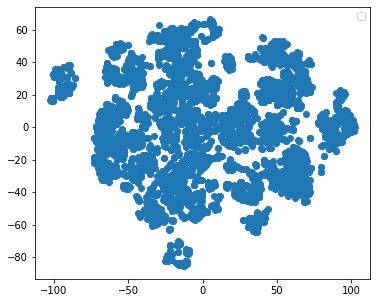

In [6]:
inp = tsne_em
print(inp.shape)

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
plt.scatter(inp[:,0], inp[:,1])
plt.legend()
plt.show()

In [15]:
# Cluster the training set
kmeans = KMeans(n_clusters=3)
clustered_training_set = kmeans.fit_predict(encoded_images)

In [9]:
clustered_training_set

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0])

In [11]:
from sklearn.mixture import GaussianMixture

gm_array = encoded_images
gm = GaussianMixture(n_components=6).fit(gm_array)
y_gm = gm.predict(gm_array)
y_gm

array([2, 1, 2, ..., 5, 1, 4], dtype=int64)

In [16]:
import shutil
from pathlib import Path

coutner = 0
for label in kmeans.labels_: # y_gm kmeans.labels_
    original_pat = paths_back[coutner]

    Path(f"./{str(label)}/").mkdir(parents=True, exist_ok=True)
    new_path = os.path.join(f"./{str(label)}/", paths_back[coutner].split('/')[-1])

    shutil.copy(original_pat, new_path)

    coutner = coutner + 1

In [14]:
from sklearn.mixture import GaussianMixture
import shutil
from pathlib import Path

for i in range(5, 6):
    gm_array = encoded_images
    gm = GaussianMixture(n_components=i).fit(gm_array)
    y_gm = gm.predict(gm_array)

    coutner = 0
    for label in y_gm: # y_gm kmeans.labels_
        original_pat = paths_back[coutner]

        Path(f"./rims_cluster_gm2/").mkdir(parents=True, exist_ok=True)
        Path(f"./rims_cluster_gm2/{str(i)}_clusters/").mkdir(parents=True, exist_ok=True)
        Path(f"./rims_cluster_gm2/{str(i)}_clusters/{str(label)}/").mkdir(parents=True, exist_ok=True)
        new_path = os.path.join(f"./rims_cluster_gm2/{str(i)}_clusters/{str(label)}/", paths_back[coutner].split('/')[-1])

        shutil.copy(original_pat, new_path)

        coutner = coutner + 1

In [6]:
import cv2

winSize = (20,20)
blockSize = (10,10)
blockStride = (5,5)
cellSize = (10,10)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
signedGradients = True

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels, signedGradients)
descriptor = hog.compute(load_img(paths[0], target_size=(224,224)))


TypeError: Expected Ptr<cv::UMat> for argument 'img'

In [66]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
import PIL

model = VGG16(weights='imagenet', include_top=False)
model.summary()

img_path = '3_extracted_rims/000_000_000_01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print (vgg16_feature.shape)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [67]:
from os import listdir
from os.path import isfile, join

mypath = '3_extracted_rims/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

model = VGG16(weights='imagenet', include_top=False)

vgg16_feature_list = []

for f in onlyfiles[:10]:
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    # img_data = vgg16_preprocess(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())

vgg16_feature_list_np = np.array(vgg16_feature_list)
# kmeans = KMeans(n_clusters=2, random_state=0).fit(vgg16_feature_list_np)
        
        
        


In [68]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

NameError: name 'TSNE' is not defined

In [6]:
import time 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

time_start = time.time()
tsne = TSNE(n_components=1, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(vgg16_feature_list_np)

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.002s...
[t-SNE] Computed neighbors for 10 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.257629
[t-SNE] KL divergence after 300 iterations: 0.895046


NameError: name 'df_subset' is not defined